In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split    
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score , roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

In [2]:
f = pd.read_csv("clean_data.csv")
# f = f.set_index('encounter_id')
f = f.drop('readmitted.1',axis = 1)
f.head()

,encounter_id,CCI,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,diabetesMed_No,diabetesMed_Yes
0,2278392,0,8222157,1,41,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,149190,0,55629189,3,59,0,18,0,0,0,...,1,0,1,0,1,0,1,0,0,1
2,64410,0,86047875,2,11,5,13,2,0,1,...,1,0,1,0,1,0,1,0,0,1
3,500364,0,82442376,2,44,1,16,0,0,0,...,1,0,1,0,1,0,1,0,0,1
4,16680,8,42519267,1,51,0,8,0,0,0,...,1,0,1,0,1,0,1,0,0,1


In [3]:
if 'patient_nbr' in f.columns:
    f = f.drop(['patient_nbr'],axis = 1)
if 'encounter_id' in f.columns:
    f = f.drop(['encounter_id'],axis = 1)
scaler=preprocessing.RobustScaler()
scaled_data=scaler.fit_transform(f)

### Without PCA

In [4]:
dataLabel=f['readmitted']
dataAttributes=f.drop(['readmitted'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(dataAttributes,dataLabel,test_size=0.40,random_state=100)
clf = LogisticRegression(random_state=0, C = 2.5).fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

In [5]:
print("Confusion Matrix for Logistic Regression on training dataset")
conf_matrix_train=confusion_matrix(y_train,predictions_train)
print(conf_matrix_train)
accuracy=accuracy_score(y_train, predictions_train)
f1_Score=f1_score(y_train, predictions_train, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit{}".format(f1_Score))

matrix_report=classification_report(y_train,predictions_train) 
print(matrix_report)

print(" ROC ",roc_auc_score(y_train,predictions_train))

Confusion Matrix for Logistic Regression on training dataset
[[54108   128]
 [ 6692   131]]
Accuracy of logit0.8883047544178582
F1 Score OF logit0.8883047544178582
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     54236
          1       0.51      0.02      0.04      6823

avg / total       0.85      0.89      0.84     61059

 ROC  0.508419854723858


In [6]:
print("Confusion Matrix for logistic regression on Testing dataset")
conf_matrix_test=confusion_matrix(y_test,predictions_test)
print(conf_matrix_test)
accuracy=accuracy_score(y_test, predictions_test)
f1_Score=f1_score(y_test, predictions_test, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit {}".format(f1_Score))

matrix_report=classification_report(y_test,predictions_test) 
print(matrix_report)

print(" ROC ",roc_auc_score(y_test,predictions_test))

Confusion Matrix for logistic regression on Testing dataset
[[36081    92]
 [ 4459    75]]
Accuracy of logit0.8882010465030584
F1 Score OF logit 0.8882010465030584
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     36173
          1       0.45      0.02      0.03      4534

avg / total       0.84      0.89      0.84     40707

 ROC  0.5069991758104168


### With PCA

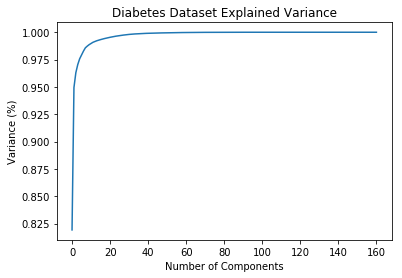

In [7]:
pca = PCA().fit(dataAttributes)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Diabetes Dataset Explained Variance')
plt.show()

In [8]:
pca = PCA(n_components=20)
dataset=pca.fit_transform(dataAttributes)
principalDf = pd.DataFrame(data = dataset)
finalDf = pd.concat([principalDf,dataLabel],axis = 1)
finalDf = pd.merge(principalDf,dataLabel.to_frame(),left_index=True, right_index=True,how = 'left')
finalDf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,readmitted
0,-4.356064,-15.351343,-1.538056,-5.249538,-1.012340,0.376968,0.368504,0.313361,-0.243730,1.259842,...,-0.654896,0.143392,0.746108,0.293049,-0.250890,0.201666,-0.082696,0.117908,-0.032121,0
1,15.949476,-0.552336,-2.036244,1.565729,-0.776021,-1.333745,-1.103733,-0.022669,0.078995,-0.278368,...,-0.531614,-0.047846,0.067039,-0.538679,-0.649597,-0.395045,-0.195025,0.225293,-0.087020,0
2,-32.282711,1.345651,-1.086720,-1.226035,3.016284,2.333418,-0.192814,0.669142,-0.290945,-0.035291,...,-0.636404,-0.005321,-0.729891,0.385263,-0.021591,-0.232560,1.369515,-0.070040,0.014994,0
3,0.762969,-0.603604,-2.490579,-0.199463,-0.147989,-0.733488,-0.632751,-0.056379,0.101393,-0.560060,...,0.813340,-0.120891,0.231074,-0.288849,-0.704418,-0.368711,-0.226353,0.174489,-0.117284,0
4,6.575245,-9.612853,-2.164849,-0.225285,-1.701961,-0.354212,7.339413,1.082432,0.676246,-1.278899,...,0.628030,-0.188099,0.323073,-0.350826,-0.099102,-0.059391,1.019094,0.004171,-0.353631,0
5,-11.999560,1.910029,-0.868823,0.607769,5.037955,0.253630,-0.208141,-0.328913,0.080071,-0.736344,...,0.433025,-0.755188,0.317421,-0.432155,0.331195,0.199491,-0.033505,-1.063756,0.183998,0
6,27.238734,1.003354,-2.252923,-0.895403,-0.393842,-0.829438,-0.652373,0.111770,0.100876,-0.943031,...,0.588927,0.229467,-0.323151,-0.459707,0.495152,0.764705,-0.260044,0.576852,0.097177,0
7,29.108408,-8.057459,0.530628,0.891398,-0.696860,-0.952902,2.032715,0.538313,0.111097,0.133524,...,0.897218,0.414219,0.086985,-0.201739,0.678474,-0.693672,-0.455917,0.331549,0.248726,0
8,26.676943,9.635443,5.541282,-1.556683,-0.167588,-0.851004,-1.042914,0.258470,0.200266,-0.475769,...,-0.677787,-0.375665,0.285739,-0.883070,0.004514,0.029696,1.309734,-0.717592,0.348094,0
9,-9.301586,4.811444,7.716984,-0.133104,0.782774,-0.331545,4.912045,0.912104,0.579039,-0.885703,...,-0.930556,-0.170685,0.590480,0.000758,-0.038277,0.254875,-0.151497,0.165203,-0.455409,0


In [9]:
Label=finalDf['readmitted']
Attributes=finalDf.drop(['readmitted'],axis=1)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(Attributes,Label,test_size=0.20,random_state=100)
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train_1, y_train_1)
predictions_train = clf.predict(X_train_1)
predictions_test = clf.predict(X_test_1)

In [10]:
print("Confusion Matrix for Logistic Regression on training dataset")
conf_matrix_train=confusion_matrix(y_train_1,predictions_train)
print(conf_matrix_train)
accuracy=accuracy_score(y_train_1, predictions_train)
f1_Score=f1_score(y_train_1, predictions_train, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit{}".format(f1_Score))

matrix_report=classification_report(y_train_1,predictions_train) 
print(matrix_report)

print(" ROC ",roc_auc_score(y_train_1,predictions_train))

Confusion Matrix for Logistic Regression on training dataset
[[72136   136]
 [ 9012   128]]
Accuracy of logit0.887633272736206
F1 Score OF logit0.887633272736206
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     72272
          1       0.48      0.01      0.03      9140

avg / total       0.84      0.89      0.84     81412

 ROC  0.5060612982125877


In [11]:
print("Confusion Matrix for logistic regression on Testing dataset")
conf_matrix_test=confusion_matrix(y_test_1,predictions_test)
print(conf_matrix_test)
accuracy=accuracy_score(y_test_1, predictions_test)
f1_Score=f1_score(y_test_1, predictions_test, average='micro')
print("Accuracy of logit{}".format(accuracy))
print("F1 Score OF logit {}".format(f1_Score))

matrix_report=classification_report(y_test_1,predictions_test) 
print(matrix_report)

print(" ROC ",roc_auc_score(y_train_1,predictions_train))

Confusion Matrix for logistic regression on Testing dataset
[[18097    40]
 [ 2183    34]]
Accuracy of logit0.8907831384494448
F1 Score OF logit 0.8907831384494448
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     18137
          1       0.46      0.02      0.03      2217

avg / total       0.85      0.89      0.84     20354

 ROC  0.5060612982125877
